In [12]:
import os
from glob import glob

import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm

plt.style.use("papers")

MODALITY = "EC"
DATA_FOLDER = "../../data/test_data_LEMON/"
SAVE_FOLDER = "../../data/LEMON_VAR_data/"

CROP = 60.0  # 1 minute
MAX_ORDER = 30

SIMULATE = 20.0 * 60.0  # 20 minutes

In [2]:
def order_df(results):
    df = pd.DataFrame(results.summary().data)
    for col in df:
        df[col] = df[col].str.strip()
        df[col] = df[col].str.replace("*", "")
    df.columns = df.iloc[0]
    df = df.iloc[1:, 1:]
    df.index = np.arange(0, len(df))
    df.index.name = "order"
    df = df.astype(float)
    return df

## Select order

In [3]:
all_orders = pd.DataFrame()

for file in tqdm(sorted(glob(DATA_FOLDER + f"*{MODALITY}*.set"))):
    subject_id = os.path.basename(file).split(".")[0]
    mne_data = mne.io.read_raw_eeglab(file, preload=True)
    mne_data.crop(tmax=CROP)
    pd_data = pd.DataFrame(
        mne_data.get_data().T * 10e6,
        columns=mne_data.info["ch_names"],
        index=mne_data.times,
    )
    model = VAR(pd_data)
    order_results = model.select_order(MAX_ORDER)
    orders_df = order_df(order_results)
    aic = orders_df["AIC"].to_frame().rename(columns={"AIC": subject_id})
    all_orders = pd.concat([all_orders, aic], axis=1)

  0%|                                                                                                                                                                                | 0/16 [00:00<?, ?it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010002_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 12%|████████████████████▉                                                                                                                                                  | 2/16 [04:29<31:21, 134.36s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 19%|███████████████████████████████▎                                                                                                                                       | 3/16 [06:36<28:21, 130.88s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010005_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 25%|█████████████████████████████████████████▊                                                                                                                             | 4/16 [08:40<25:38, 128.21s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010006_EC.fdt
Reading 0 ... 116011  =      0.000 ...   464.044 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 31%|████████████████████████████████████████████████████▏                                                                                                                  | 5/16 [10:58<24:12, 132.02s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010007_EC.fdt
Reading 0 ... 119979  =      0.000 ...   479.916 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 38%|██████████████████████████████████████████████████████████████▋                                                                                                        | 6/16 [12:54<21:05, 126.54s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010024_EC.fdt
Reading 0 ... 116677  =      0.000 ...   466.708 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 44%|█████████████████████████████████████████████████████████████████████████                                                                                              | 7/16 [15:25<20:11, 134.56s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010030_EC.fdt
Reading 0 ... 118602  =      0.000 ...   474.408 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 8/16 [17:35<17:44, 133.03s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010222_EC.fdt
Reading 0 ... 118764  =      0.000 ...   475.056 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 56%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 9/16 [19:36<15:05, 129.33s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010224_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 10/16 [21:30<12:27, 124.59s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010229_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 11/16 [23:36<10:24, 124.87s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010270_EC.fdt
Reading 0 ... 119989  =      0.000 ...   479.956 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 12/16 [25:55<08:36, 129.24s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010276_EC.fdt
Reading 0 ... 47623  =      0.000 ...   476.230 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 13/16 [27:01<05:30, 110.18s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010297_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 14/16 [29:17<03:55, 117.91s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010305_EC.fdt
Reading 0 ... 119956  =      0.000 ...   479.824 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 15/16 [31:25<02:01, 121.02s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010318_EC.fdt
Reading 0 ... 119978  =      0.000 ...   479.912 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/3774211762.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [33:32<00:00, 125.75s/it]


In [13]:
mins = all_orders.idxmin()
display(mins)
display(mins.median(), mins.mean())

sub-010002_EC    21
sub-010003_EC    28
sub-010004_EC    19
sub-010005_EC    17
sub-010006_EC    19
sub-010007_EC    21
sub-010024_EC    21
sub-010030_EC    19
sub-010222_EC    13
sub-010224_EC    17
sub-010229_EC    24
sub-010270_EC    17
sub-010276_EC     3
sub-010297_EC    20
sub-010305_EC    21
sub-010318_EC    19
dtype: int64

19.0

18.6875

<AxesSubplot:xlabel='order', ylabel='AIC'>

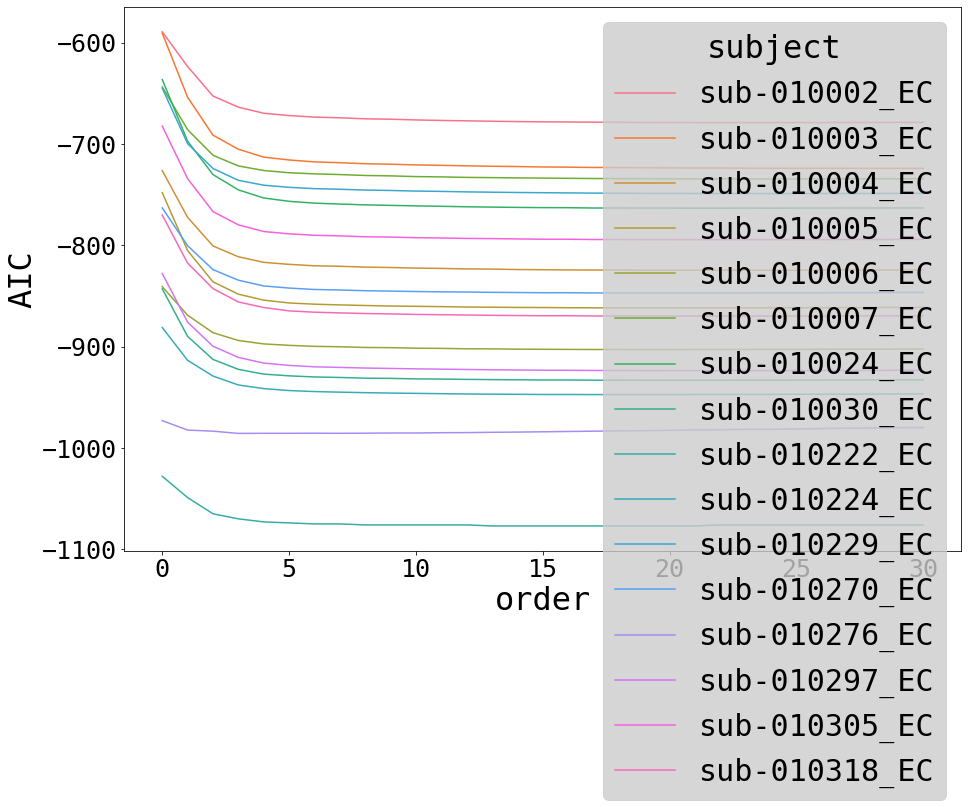

In [5]:
df_orders = all_orders.reset_index().melt(
    id_vars="order", var_name="subject", value_name="AIC"
)
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_orders, x="order", y="AIC", hue="subject")

In [14]:
SELECTED_ORDER = 19

## Fit "forecast" and save

In [23]:
for file in tqdm(sorted(glob(DATA_FOLDER + f"*{MODALITY}*.set"))):
    subject_id = os.path.basename(file).split(".")[0]
    mne_data = mne.io.read_raw_eeglab(file, preload=True)
    mne_data.crop(tmax=CROP)
    pd_data = pd.DataFrame(
        mne_data.get_data().T * 10e6,
        columns=mne_data.info["ch_names"],
        index=mne_data.times,
    )
    model = VAR(pd_data)
    fit_results = model.fit(SELECTED_ORDER)
    simulated = fit_results.simulate_var(steps=int(SIMULATE*mne_data.info["sfreq"]))
    simulated_mne = mne.io.RawArray(simulated.T / 10e6, mne_data.info)
    simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))

  0%|                                                                                                                                                                                | 0/16 [00:00<?, ?it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010002_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=59, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010002_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010002_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010002_EC_var.fif
[done]


  6%|██████████▌                                                                                                                                                             | 1/16 [00:21<05:22, 21.47s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=60, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010003_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010003_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010003_EC_var.fif
[done]


 12%|█████████████████████                                                                                                                                                   | 2/16 [00:41<04:50, 20.76s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=61, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010004_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010004_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010004_EC_var.fif
[done]


 19%|███████████████████████████████▌                                                                                                                                        | 3/16 [01:03<04:34, 21.14s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010005_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=61, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010005_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010005_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010005_EC_var.fif
[done]


 25%|██████████████████████████████████████████                                                                                                                              | 4/16 [01:23<04:11, 20.93s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010006_EC.fdt
Reading 0 ... 116011  =      0.000 ...   464.044 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=60, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010006_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010006_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010006_EC_var.fif
[done]


 31%|████████████████████████████████████████████████████▌                                                                                                                   | 5/16 [01:44<03:49, 20.83s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010007_EC.fdt
Reading 0 ... 119979  =      0.000 ...   479.916 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=57, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010007_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010007_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010007_EC_var.fif
[done]


 38%|███████████████████████████████████████████████████████████████                                                                                                         | 6/16 [02:04<03:26, 20.64s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010024_EC.fdt
Reading 0 ... 116677  =      0.000 ...   466.708 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=61, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010024_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010024_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010024_EC_var.fif
[done]


 44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 7/16 [02:24<03:04, 20.46s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010030_EC.fdt
Reading 0 ... 118602  =      0.000 ...   474.408 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=61, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010030_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010030_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010030_EC_var.fif
[done]


 50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 8/16 [02:44<02:42, 20.30s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010222_EC.fdt
Reading 0 ... 118764  =      0.000 ...   475.056 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=61, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010222_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010222_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010222_EC_var.fif
[done]


 56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 9/16 [03:05<02:22, 20.30s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010224_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=61, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010224_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010224_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010224_EC_var.fif
[done]


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 10/16 [03:26<02:02, 20.48s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010229_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=60, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010229_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010229_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010229_EC_var.fif
[done]


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 11/16 [03:45<01:41, 20.30s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010270_EC.fdt
Reading 0 ... 119989  =      0.000 ...   479.956 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=60, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010270_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010270_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010270_EC_var.fif
[done]


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 12/16 [04:07<01:22, 20.61s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010276_EC.fdt
Reading 0 ... 47623  =      0.000 ...   476.230 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=61, n_times=120000
    Range : 0 ... 119999 =      0.000 ...  1199.990 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010276_EC_var.fif
Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010276_EC_var.fif
[done]


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010276_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))
 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 13/16 [04:18<00:52, 17.63s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010297_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=61, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010297_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010297_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010297_EC_var.fif
[done]


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 14/16 [04:39<00:37, 18.70s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010305_EC.fdt
Reading 0 ... 119956  =      0.000 ...   479.824 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=60, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010305_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010305_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010305_EC_var.fif
[done]


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 15/16 [04:59<00:19, 19.10s/it]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010318_EC.fdt
Reading 0 ... 119978  =      0.000 ...   479.912 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Creating RawArray with float64 data, n_channels=60, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Writing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010318_EC_var.fif


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_81641/1832614451.py:14: RuntimeWarning: This filename (/Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010318_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  simulated_mne.save(os.path.join(SAVE_FOLDER, f"{subject_id}_var.fif"))


Closing /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/LEMON_VAR_data/sub-010318_EC_var.fif
[done]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [05:19<00:00, 19.95s/it]


Effective window size : 8.192 (s)


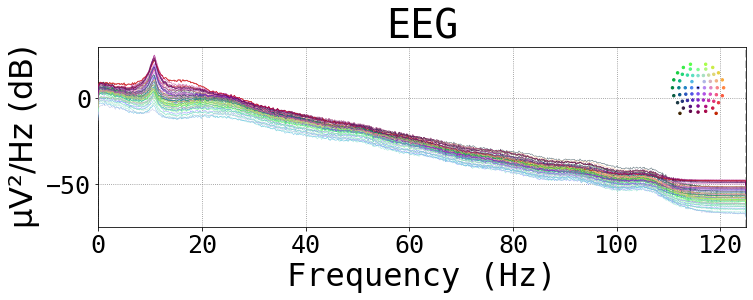

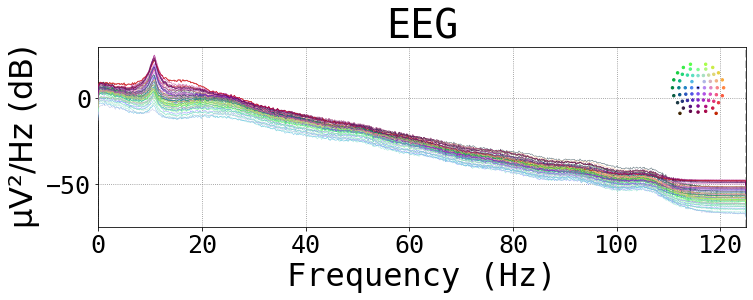

In [29]:
simulated_mne.plot_psd()